# PyFolding

Let's test out our **PyFolding** installation using an IPython notebook. This is a nice way to store data, processing and results all in one place!

---

### Testing *PyFolding*

PyFolding contains a standard test function to make sure that the installation is functioning correctly. This standard test function automatically generates data for a two-state folding protein: $D \leftrightharpoons N$

This includes a two-state equilibrium denaturation curve:
\begin{equation}
F = \frac{\exp( m(x-d_{50})) / RT} { 1+\exp(m(x-d_{50}))/RT}
\end{equation}

and a two-state chevron plot:
\begin{equation}
k_{obs} = k_u^{H_2O}\exp(-m_{ku}x) + k_f^{H_2O}\exp(m_{kf}x)
\end{equation}


Here is an example script:

<IPython.core.display.Javascript object>

PyFolding: Jupyter autoscrolling has been disabled
Fitting results
ID: Simulated protein
Model: TwoStateEquilibrium
Optimiser: pyfolding.GlobalFit and scipy.optimize.curve_fit
Temperature: 25.00°C

(f) m      1.47571 ± 0.00016    	 95% CI[   1.47567,    1.47575]
(f) d50    4.99217 ± 0.00005    	 95% CI[   4.99216,    4.99219]
--------------------------------------------------------------------------------
R^2: 0.99952


Fitting results
ID: Simulated protein
Model: TwoStateChevron
Optimiser: pyfolding.GlobalFit and scipy.optimize.curve_fit
Temperature: 25.00°C

(f) kf   99.99855 ± 0.00003    	 95% CI[  99.99854,   99.99856]
(f) mf    1.00006 ± 0.00000    	 95% CI[   1.00006,    1.00006]
(f) ku    0.00500 ± 0.00000    	 95% CI[   0.00500,    0.00500]
(f) mu    1.00002 ± 0.00000    	 95% CI[   1.00002,    1.00002]
--------------------------------------------------------------------------------
R^2: 1.00000


Test completed!


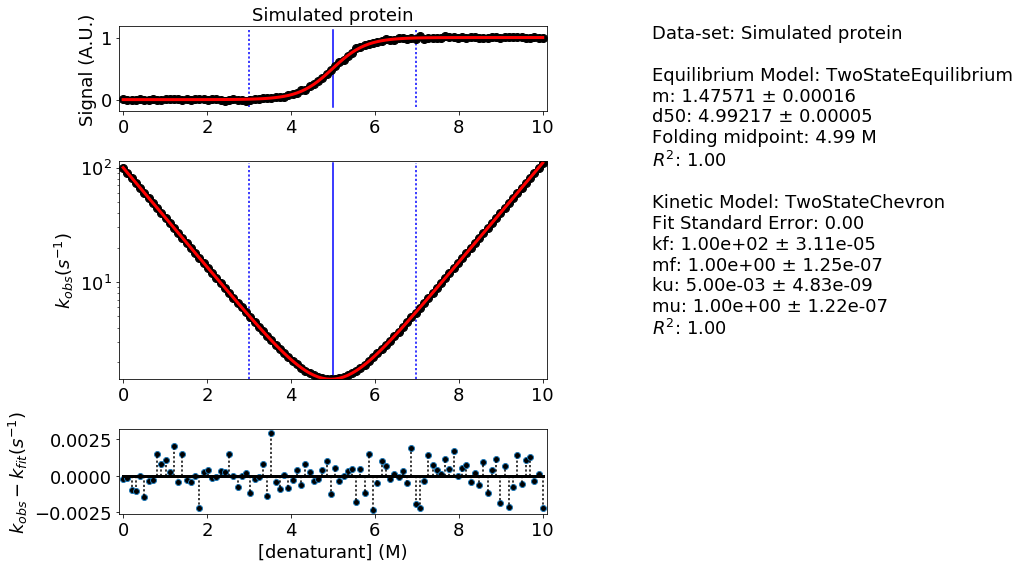

In [1]:
%matplotlib inline

# import pyfolding
import pyfolding

# now test it
pyfolding.test()

---

### Displaying details of the fitting equations
 We can list all of the models available by calling the ```list_models``` function:

In [2]:
from pyfolding.models import *

list_models()

[('CurvedChevronPolynomialFit', 'Verified: True'),
 ('HeteropolymerIsingEquilibrium', 'Verified: False'),
 ('HomozipperIsingEquilibrium', 'Verified: True'),
 ('ParallelTwoStateChevron', 'Verified: False'),
 ('ParallelTwoStateUnfoldingChevron', 'Verified: False'),
 ('TemplateModel', 'Verified: False'),
 ('ThreeStateChevron', 'Verified: True'),
 ('ThreeStateDimericIEquilibrium', 'Verified: True'),
 ('ThreeStateEquilibrium', 'Verified: True'),
 ('ThreeStateFastPhaseChevron', 'Verified: True'),
 ('ThreeStateMonoIEquilibrium', 'Verified: True'),
 ('ThreeStateSequentialChevron', 'Verified: True'),
 ('TwoStateChevron', 'Verified: True'),
 ('TwoStateChevronMovingTransition', 'Verified: True'),
 ('TwoStateDimerEquilibrium', 'Verified: True'),
 ('TwoStateEquilibrium', 'Verified: True'),
 ('TwoStateEquilibriumSloping', 'Verified: True')]

If we want to know any further information, we can print the equation. Each function has a pre-formatted $\LaTeX$ equation, details of the parameters and the primary reference. These can be displayed by using the ```info()``` function bound to each FitModel:

In [3]:
TwoStateEquilibrium().info()

<IPython.core.display.Math object>

 Two state equilibrium denaturation curve - No sloping baseline.

	Folding Scheme:
		N <-> D

	Params:
		F = Fraction unfolded
		m = m-value
		x = denaturant concentration (M)
		d50 = denaturant midpoint (M)
		R = Universal Gas Constant (kcal.mol-1.K-1)
		T = Temperature (Kelvin)

	Reference:
		Clarke and Fersht. Engineered disulfide bonds as probes of
		the folding pathway of barnase: Increasing the stability
		of proteins against the rate of denaturation.
		Biochemistry (1993) vol. 32 (16) pp. 4322-4329
	


In [4]:
TwoStateChevron().info()

<IPython.core.display.Math object>

 Two state chevron plot.

	Folding Scheme:
		N <-> D

	Params:
		k obs = rate of unfolding or refolding at a particular denaturant concentration
		kf = rate constant of refolding at a particular denaturant concentration
		mf = the gradient of refolding arm of the chevron
		ku = rate constant of unfolding at a a particular denaturant concentration
		mu = the gradient of unfolding arm of the chevron
		x = denaturant concentration (M)

	Notes:
		Jackson SE and Fersht AR.  Folding of chymotrypsin inhibitor 2.
		1. Evidence for a two-state transition.
		Biochemistry (1991) 30(43):10428-10435.
	


In [5]:
ThreeStateChevron().info()

<IPython.core.display.Math object>

 Three state chevron with single intermediate.

	Folding Scheme:
		N <-> I <-> D

	Params:
		k obs = rate of unfolding or refolding at a particular denaturant concentration
		kfi = microscopic rate constant for the conversion of folded to intermediate
		kif = microscopic rate constant for the conversion of intermediate to folded
		i.e. k_if = kif(H20) * exp((mi - mif)*x)
		Kiu = equilibrium constant for the rapid equilibration between intermediate & unfolded
		i.e. Kiu = Kiu(H2O) * exp((mu-mi)*x)
		mif = m-value associated with the kinetic transition between intermediate & folded
		mi = m-value associated with the equilibrium transition between intermediate & folded
		mu = m-value associated with the equilibrium transition between unfolded & folded
		x = denaturant concentration (M)

	Reference:
		Parker et al. An integrated kinetic analysis of
		intermediates and transition states in protein folding reactions.
		Journal of molecular biology (1995) vol. 253 (5) pp. 771-86
	


If we would like to get further details, for example the arguments of the equation, we can get those easily by request the fit function arguments:

In [6]:
ThreeStateChevron().fit_func_args

['kfi', 'mif', 'kif', 'mi', 'Kiu', 'mu']